In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goibibo-flight-data/goibibo_flights_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("/kaggle/input/goibibo-flight-data/goibibo_flights_data.csv")

In [4]:
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN


In [5]:
df.dtypes

flight date     object
airline         object
flight_num      object
class           object
from            object
dep_time        object
to              object
arr_time        object
duration        object
price           object
stops           object
Unnamed: 11    float64
Unnamed: 12    float64
dtype: object

In [6]:
df.isnull().sum()

flight date         0
airline             0
flight_num          0
class               0
from                0
dep_time            0
to                  0
arr_time            0
duration            0
price               0
stops               0
Unnamed: 11    300261
Unnamed: 12    300261
dtype: int64

In [7]:
df.drop('Unnamed: 11', axis=1,inplace=True)

In [8]:
df.drop('Unnamed: 12', axis=1,inplace=True)

In [9]:
df.describe()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
count,300261,300261,300261,300261,300261,300261,300261,300261,300261,300261,300261
unique,49,8,1569,2,6,251,6,266,483,12170,40
top,20-07-2023,Vistara,UK-706,economy,Delhi,07:00,Mumbai,19:55,02h 10m,"55,427",1-stop
freq,6633,127859,3235,206774,61345,8760,59109,9194,4242,1445,243603


In [10]:
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop


In [11]:
df['Date']=df['flight date'].str.split('-').str[0]
df['Month']=df['flight date'].str.split('-').str[1]
df['Year']=df['flight date'].str.split('-').str[2]

In [12]:
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Date,Month,Year
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,26,06,2023
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,26,06,2023
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,26,06,2023
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,26,06,2023
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,26,06,2023


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   flight date  300261 non-null  object
 1   airline      300261 non-null  object
 2   flight_num   300261 non-null  object
 3   class        300261 non-null  object
 4   from         300261 non-null  object
 5   dep_time     300261 non-null  object
 6   to           300261 non-null  object
 7   arr_time     300261 non-null  object
 8   duration     300261 non-null  object
 9   price        300261 non-null  object
 10  stops        300261 non-null  object
 11  Date         300261 non-null  object
 12  Month        300261 non-null  object
 13  Year         300261 non-null  object
dtypes: object(14)
memory usage: 32.1+ MB


In [14]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [15]:
df.drop('flight date',axis=1,inplace=True)

In [16]:
df['arr_time'].unique()

array(['21:05', '08:40', '06:35', '12:35', '11:10', '14:00', '11:35',
       '16:30', '10:10', '16:35', '17:15', '12:50', '09:25', '14:10',
       '11:05', '09:05', '07:15', '11:20', '18:10', '20:20', '21:35',
       '12:00', '17:40', '19:25', '22:05', '20:50', '14:05', '19:50',
       '08:15', '13:45', '23:50', '10:35', '08:35', '15:00', '20:05',
       '16:00', '15:50', '08:05', '13:35', '17:55', '22:25', '14:30',
       '12:25', '13:00', '20:15', '21:50', '20:45', '23:00', '16:15',
       '23:05', '21:15', '13:15', '23:30', '22:35', '11:25', '18:20',
       '23:55', '11:40', '17:25', '17:50', '15:55', '09:35', '22:00',
       '22:50', '21:55', '23:15', '21:10', '13:05', '20:00', '22:10',
       '07:45', '18:00', '16:40', '12:30', '15:15', '19:15', '14:35',
       '19:40', '08:25', '00:10', '17:30', '08:20', '15:45', '09:50',
       '21:25', '15:05', '14:45', '07:25', '10:05', '14:15', '20:35',
       '16:05', '18:50', '17:05', '08:10', '11:15', '23:25', '11:30',
       '10:00', '16:

In [17]:
df['Arrival_hour']=df['arr_time'].str.split(':').str[0]
df['Arrival_min']=df['arr_time'].str.split(':').str[1]


In [18]:
df.head(2)

,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Date,Month,Year,Arrival_hour,Arrival_min
0,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,26,6,2023,21,05
1,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,26,6,2023,08,40


In [19]:
df.drop('arr_time',axis=1,inplace=True)

In [20]:
df.head(2)

,airline,flight_num,class,from,dep_time,to,duration,price,stops,Date,Month,Year,Arrival_hour,Arrival_min
0,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,02h 10m,"6,013",non-stop,26,6,2023,21,05
1,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,02h 20m,"6,013",non-stop,26,6,2023,08,40


In [21]:
df['Dep_hour']=df['dep_time'].str.split(':').str[0]
df['Dep_min']=df['dep_time'].str.split(':').str[1]

In [22]:
df['Dep_hour']=df['Dep_hour'].astype(int)
df['Dep_min']=df['Dep_min'].astype(int)

In [23]:
df.head(2)

,airline,flight_num,class,from,dep_time,to,duration,price,stops,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,02h 10m,"6,013",non-stop,26,6,2023,21,05,18,55
1,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,02h 20m,"6,013",non-stop,26,6,2023,08,40,6,20


In [24]:
df.drop("dep_time",axis=1,inplace=True)

In [25]:
df['stops'].unique()

array(['non-stop', '1-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n

In [26]:
df[df['stops'].isnull()]

,airline,flight_num,class,from,to,duration,price,stops,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min


No null values

In [27]:
df['stops']=df['stops'].map({'non-stop':0,'1-stop':1,'2+-stop':2})

In [28]:
df.head(2)

,airline,flight_num,class,from,to,duration,price,stops,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,SpiceJet,SG-8709,economy,Delhi,Mumbai,02h 10m,"6,013",0.0,26,6,2023,21,05,18,55
1,SpiceJet,SG-8157,economy,Delhi,Mumbai,02h 20m,"6,013",0.0,26,6,2023,08,40,6,20


In [29]:
df['Duration_hour']=df['duration'].str.split(' ').str[0].str.split('h').str[0]


In [30]:
df['Duration_minute']=df['duration'].str.split(' ').str[1].str.split('m').str[0]


In [31]:
df.head(2)

,airline,flight_num,class,from,to,duration,price,stops,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_minute
0,SpiceJet,SG-8709,economy,Delhi,Mumbai,02h 10m,"6,013",0.0,26,6,2023,21,05,18,55,02,10
1,SpiceJet,SG-8157,economy,Delhi,Mumbai,02h 20m,"6,013",0.0,26,6,2023,08,40,6,20,02,20


In [32]:
df.drop("duration",axis=1,inplace=True)

In [33]:
df.drop("flight_num",axis=1,inplace=True)

In [34]:
df.drop('class',axis=1,inplace=True)

In [35]:
df.head(2)

,airline,from,to,price,stops,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_minute
0,SpiceJet,Delhi,Mumbai,"6,013",0.0,26,6,2023,21,05,18,55,02,10
1,SpiceJet,Delhi,Mumbai,"6,013",0.0,26,6,2023,08,40,6,20,02,20


In [36]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir'], dtype=object)

In [37]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir'], dtype=object)

In [38]:
df.rename(columns={'from': 'source', 'to': 'destination'}, inplace=True)

In [39]:
df['source'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [40]:
df.head(2)

,airline,source,destination,price,stops,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_minute
0,SpiceJet,Delhi,Mumbai,"6,013",0.0,26,6,2023,21,05,18,55,02,10
1,SpiceJet,Delhi,Mumbai,"6,013",0.0,26,6,2023,08,40,6,20,02,20


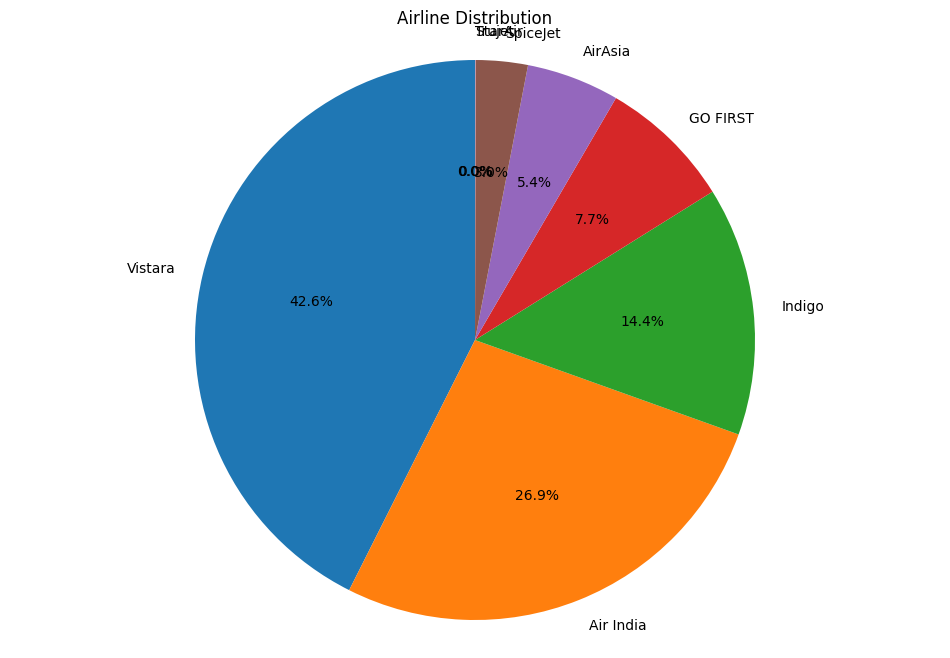

In [41]:
airline_counts = df['airline'].value_counts()

# Create the pie chart
plt.figure(figsize=(12, 8))  # Set the figure size
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Airline Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   airline          300261 non-null  object 
 1   source           300261 non-null  object 
 2   destination      300261 non-null  object 
 3   price            300261 non-null  object 
 4   stops            292935 non-null  float64
 5   Date             300261 non-null  int64  
 6   Month            300261 non-null  int64  
 7   Year             300261 non-null  int64  
 8   Arrival_hour     300261 non-null  object 
 9   Arrival_min      300261 non-null  object 
 10  Dep_hour         300261 non-null  int64  
 11  Dep_min          300261 non-null  int64  
 12  Duration_hour    300261 non-null  object 
 13  Duration_minute  300261 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 32.1+ MB


In [43]:
df['price_cleaned'] = df['price'].str.replace(',', '').astype(int)

<Axes: xlabel='airline', ylabel='price_cleaned'>

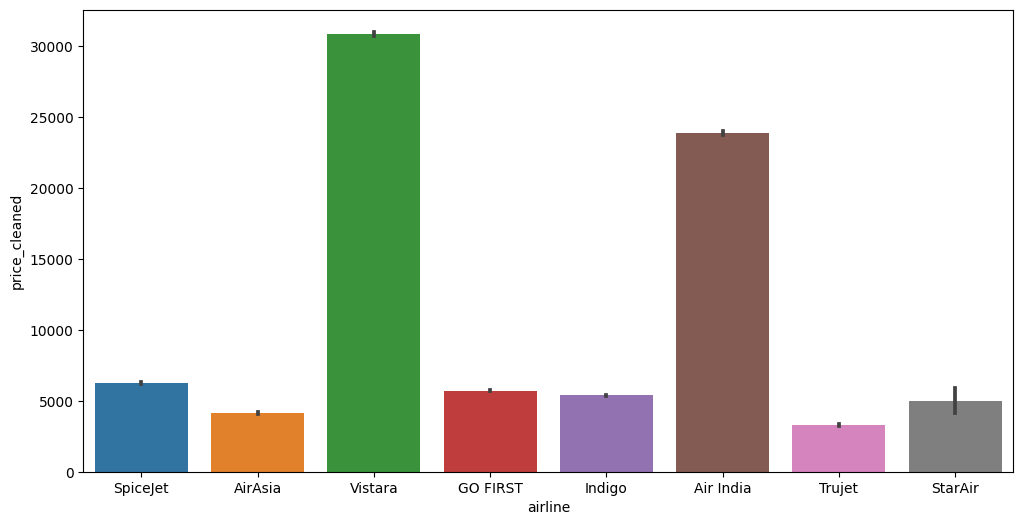

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='airline',y='price_cleaned')

<Axes: xlabel='stops', ylabel='price_cleaned'>

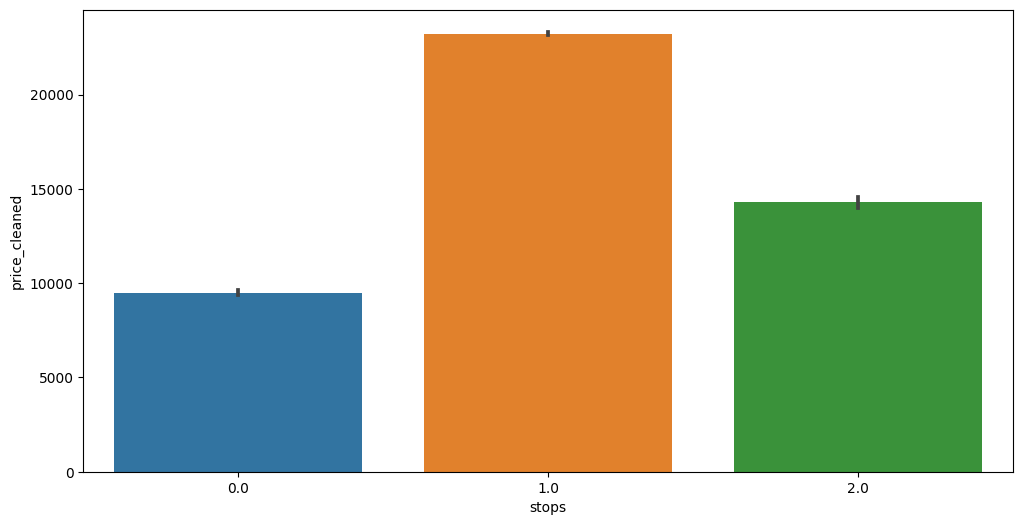

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='stops',y='price_cleaned')

<Axes: xlabel='destination', ylabel='price_cleaned'>

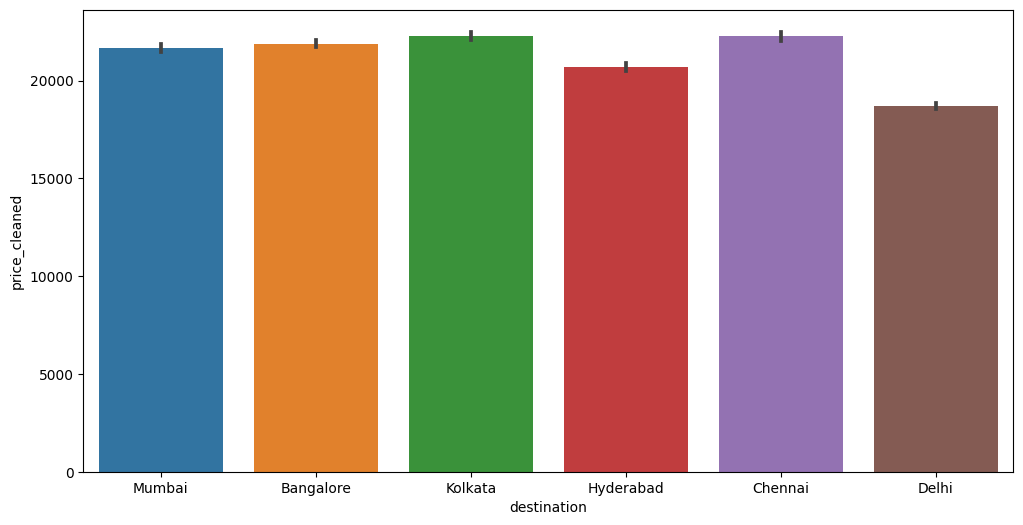

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='destination',y='price_cleaned')

<Axes: xlabel='price_cleaned'>

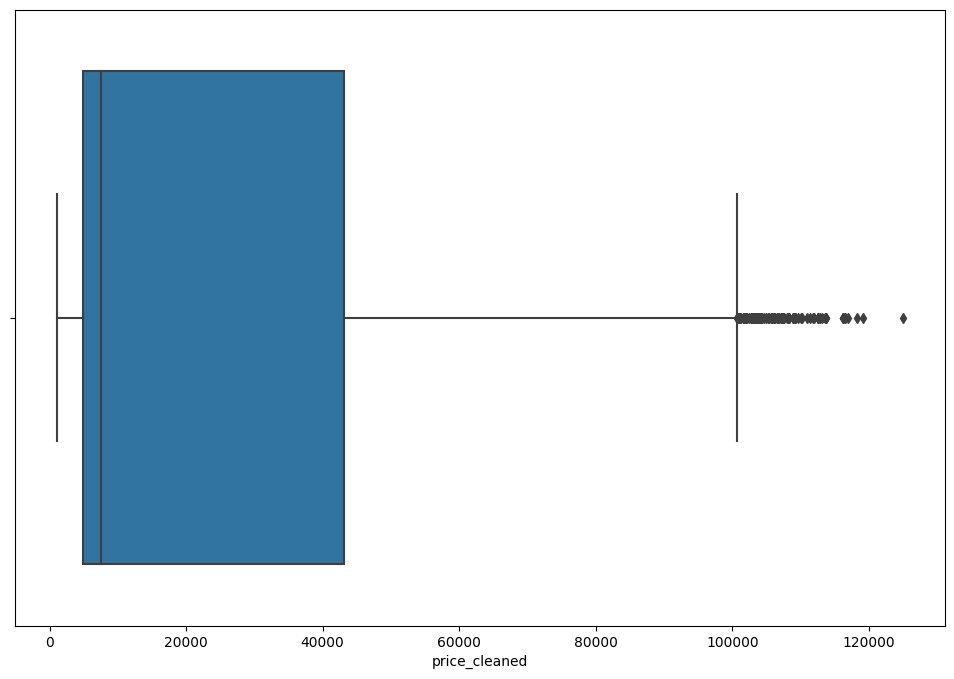

In [47]:
# Create boxplots for numerical columns
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='price_cleaned')

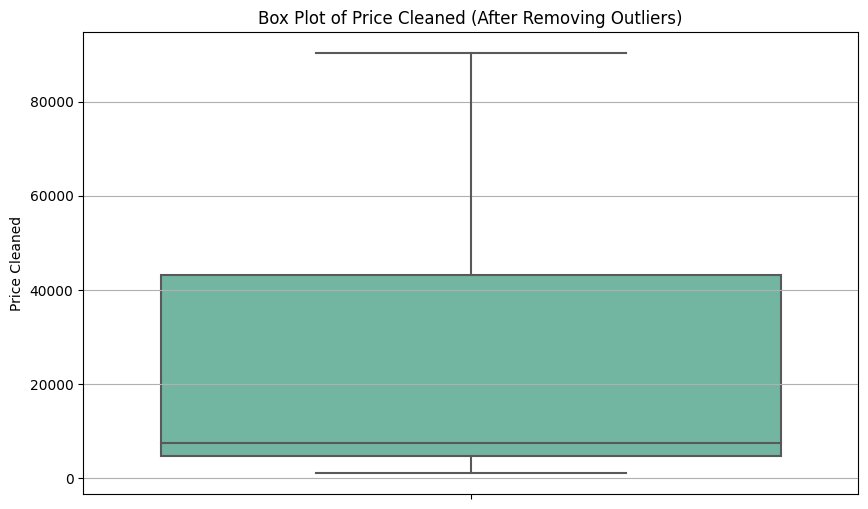

In [48]:
df['z_score'] = (df['price_cleaned'] - df['price_cleaned'].mean()) / df['price_cleaned'].std()
threshold = 3
df_cleaned = df[np.abs(df['z_score']) <= threshold]

# Drop the 'z_score' column if you don't need it anymore
df_cleaned.drop(columns=['z_score'], inplace=True)

# Create the box plot for 'price_cleaned'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, y='price_cleaned', palette='Set2')
plt.title('Box Plot of Price Cleaned (After Removing Outliers)')
plt.ylabel('Price Cleaned')
plt.grid(axis='y')
plt.show()